In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats as stm

In [2]:
df = sns.load_dataset('tips')
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [3]:
pd.crosstab(df.smoker, df.sex, normalize=True)

sex         Male    Female
smoker                    
Yes     0.245902  0.135246
No      0.397541  0.221311

In [4]:
pd.crosstab(df.smoker, df.day, normalize=True)

day         Thur       Fri       Sat       Sun
smoker                                        
Yes     0.069672  0.061475  0.172131  0.077869
No      0.184426  0.016393  0.184426  0.233607

In [5]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [6]:
df.smoker.value_counts(normalize=True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

The restaurent maneger is claiming the average total bill is $ 20. At 5% level of significance, check the claim is true or not?

S1: H0: mu_total bill = 20

    H1: mu_total bill != 20

In [7]:
# S2:
alpha = 0.05

In [8]:
## S3: since pop std is not known and alos one numeircal variable ( total bill)--> one sample t test
## t statistic = (xbar- mu)/(s/sqrt(n))
mu=20
xbar= df.total_bill.mean()
s= df.total_bill.std()
n= len( df.total_bill)
std_err = s/np.sqrt(n)
t_stat= (xbar-mu)/std_err
print(t_stat)

-0.37559294451918884


In [9]:
## S4: Find the critical values : t_critical
dof= n-1
t_crit= st.t.isf(alpha/2, dof)
t_crit

1.9697743954258797

In [10]:
# S5: Decision making 
## 1. Critical Value approach (CVA)
if abs(t_stat)< abs(t_crit):
    print(" fail to reject null hpyothesis")
else:
    print(" reject Null hypothesis")

 fail to reject null hpyothesis


In [11]:
# S5: Decision making 
## 2. P Value approach (PVA)
p_value= st.t.cdf(t_stat, dof)*2

if p_value > alpha:
    print(p_value, " fail to reject null hpyothesis")
else:
    print(p_value, " reject Null hypothesis")

0.7075471935626767  fail to reject null hpyothesis


In [12]:
# S5: Decision making 
## 3.Confidence interval Approach (CIA)
lci= xbar-(t_crit*std_err)
uci = xbar + (t_crit*std_err)

if (mu >=lci) and (mu <= uci):
    print(lci, uci , " fail to reject null hpyothesis")
else:
    print(lci, uci, " reject Null hypothesis")

18.663331704358477 20.90855354154317  fail to reject null hpyothesis


Since all 3 approaches stating that fail to reject H0: --> we can conclude that the population average of total bill is $20
or the manager claim is true

In [13]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [14]:
df.groupby('time')['total_bill'].describe()

count       mean       std   min      25%     50%      75%    max
time                                                                     
Lunch    68.0  17.168676  7.713882  7.51  12.2350  15.965  19.5325  43.11
Dinner  176.0  20.797159  9.142029  3.07  14.4375  18.390  25.2825  50.81

assumptions test: alpha=5% =0.05

    1. normality not required as the sample sizes are >30
    
    2. variance equality test to be tested - use levene test

H0:pop variance _lunch total bill = pop variance of dinner total bill
    
H1:pop variance _lunch total bill != pop variance of dinner total bill

In [15]:
ltb=df[df.time=='Lunch']['total_bill']
dtb=df[df.time=='Dinner']['total_bill']

In [16]:
st.levene(ltb,dtb)

LeveneResult(statistic=2.6906995489829337, pvalue=0.1022346107726258)

p value (0.102) > alpha(0.05)  --> fail to reject 

hence we can conclude that both popoulation variance of ltb and dtb are same

H0: mu_ltb=mu_dtb
    
H1: mu_ltb!=mu_dtb

In [17]:
st.ttest_ind(ltb,dtb,equal_var=True)  # if variance equality is rejected then use false

Ttest_indResult(statistic=-2.8976375218366424, pvalue=0.004104621407595674)

In [18]:
x1bar=ltb.mean()
x2bar=dtb.mean()
s1_2=ltb.var()
s2_2=dtb.var()
n1=len(ltb)
n2=len(dtb)
dof=n1+n2-2
pooled_var=((n1-1)*s1_2+(n2-1)*s2_2)/(n1+n2-2)
std_error=np.sqrt((pooled_var)*((1/n1)+(1/n2)))
t_stat=(x1bar-x2bar)/std_error
p_value=st.t.sf(abs(t_stat),dof)*2
print(t_stat,p_value)

-2.897637521836654 0.0041046214075955295


p value (0.004) < alpha(0.05) -->reject H0

we conclude that the bill is different for lunch and dinner

is marketing campaign effective for increasing the sales of a FMCG product? please verify @5% level of significance

In [19]:
sales_before=np.array([23,32,43,54,65,42,67,37,72,62])
sales_after=np.array([31,43,54,49,67,45,86,74,45,80])

assumption 1: test of normality

In [20]:
diff=sales_after-sales_before

#test of normality for difference values

H0: pop_data of difference values follows norml
    
H1: pop_data of difference values follows normal

In [21]:
st.shapiro(diff)

ShapiroResult(statistic=0.9530996680259705, pvalue=0.7052302360534668)

since p value(0.705) >alpha-->the population data of difference values follows normal

H0:mu_sales_after marketing campaign <= mu_sales_before marketing campaingn --> mu_difference_sales <=0
    
H1:mu_sales_after marketing campaign > mu_sales_before marketing campaingn --> mu_difference_sales >0

In [22]:
st.ttest_rel(sales_after,sales_before,alternative='greater')

Ttest_relResult(statistic=1.4511092331016304, pvalue=0.09034754392799561)

p value (0.09)>alpha(0.05) --> fail to reject H0

Test of proportion

1 sample test of proportion

is the smoking proportion 40%? verift the statement @5% level of significance

H0:P = 0.4

H1:P !=0.4

In [23]:
df.smoker.value_counts()['Yes']

93

In [24]:
df.smoker.value_counts()['Yes']/n

0.38114754098360654

In [25]:
alpha=0.05
P=0.4
smoking_yes=df.smoker.value_counts()['Yes']
n=len(df.smoker)
p=smoking_yes/n
std_error=np.sqrt(p*(1-p)/n)
z_st=(P-p)/std_error
p_value=st.norm.sf(abs(z_st))*2
print(z_st,p_value)

0.6063491832694735 0.5442829052719291


In [26]:
from statsmodels.stats.proportion import proportions_ztest,proportion_confint

In [27]:
proportions_ztest(smoking_yes,n,P)

(-0.6063491832694735, 0.5442829052719291)

p value(0.544)>alpha -->fail to reject H0

Yes the statement is true the population proportion is 40%

In [28]:
proportion_confint(smoking_yes,n)

(0.32020882495712305, 0.44208625701009)

2 sample test proportion test`

is the smoking proportion is different for male and female

H0:P_smoking_male = P_smoking_female
    
H1:H0:P_smoking_male != P_smoking_female

In [29]:
table=pd.crosstab(df.smoker,df.sex)

In [30]:
pd.crosstab(df.smoker,df.sex,normalize=True)

sex         Male    Female
smoker                    
Yes     0.245902  0.135246
No      0.397541  0.221311

In [31]:
table['Male']['Yes']

60

In [32]:
xm=table['Male']['Yes']
xf=table['Female']['Yes']
nm=table['Male'].sum()
nf=table['Female'].sum()
pm=xm/nm
pf=xf/nf
p=(xm+xf)/(nm+nf)
std_err=np.sqrt(p*(1-p)*((1/nm)+(1/nf)))
z_st=(pm-pf)/std_err
p_value=st.norm.sf(abs(z_st))*2
print(z_st,p_value)

0.043986572230939734 0.9649151073157315


In [33]:
proportions_ztest([xm,xf],[nm,nf])

(0.043986572230939734, 0.9649151073157315)

In [34]:
df.smoker

0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: category
Categories (2, object): ['Yes', 'No']

In [35]:
df.day

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [36]:
table = pd.crosstab(df.smoker,df.day)
table

day     Thur  Fri  Sat  Sun
smoker                     
Yes       17   15   42   19
No        45    4   45   57

In [37]:
import scipy.stats as st

H0: there is no association between day and smoker
H1: there is association betwen day and smoker

In [38]:
st.chi2_contingency(table)

(25.787216672396262,
 1.0567572499836523e-05,
 3,
 array([[23.63114754,  7.24180328, 33.15983607, 28.96721311],
        [38.36885246, 11.75819672, 53.84016393, 47.03278689]]))

In [39]:
# chi-square critical value
st.chi2.isf(0.05,3)

7.814727903251178

In [40]:
# p-value
st.chi2.sf(25.787216672396262,3)

1.0567572499836523e-05

In [41]:
# find if there is any association between day and time @ 5% level of significance
table1 = pd.crosstab(df.day,df.time)
table1

time  Lunch  Dinner
day                
Thur     61       1
Fri       7      12
Sat       0      87
Sun       0      76

In [42]:
st.chi2_contingency(table1)

(217.1126728434853,
 8.449897551777147e-47,
 3,
 array([[17.27868852, 44.72131148],
        [ 5.29508197, 13.70491803],
        [24.24590164, 62.75409836],
        [21.18032787, 54.81967213]]))

In [43]:
# chi-square critical value
st.chi2.isf(0.05,3)

7.814727903251178

In [44]:
# p-value
st.chi2.sf(217.1126728434853,3)

8.449897551777147e-47

In [45]:
# for goodness of fit test - dof=row-1 or col-1, if col-1 = 0 then we take row-1
# please verify the random number generating machine is goodfit for randomness with the following data-
# obs = (22,28,24,26)

In [46]:
obs = np.array([22,28,24,26])
exp = np.array([25,25,25,25])

In [47]:
st.chisquare(obs,exp)

Power_divergenceResult(statistic=0.8, pvalue=0.8494670333918255)

In [48]:
# p-value
st.chi2.sf(0.8,3)

0.8494670333918255

In [49]:
# critical value
st.chi2.isf(0.05,3)

7.814727903251178

In [50]:
obs = np.array(st.norm.rvs(10,0.5,100))

In [51]:
obs

array([ 9.53701626,  9.82010599, 10.08809093,  9.88380873, 10.15783107,
       10.14087254,  9.4494455 , 10.04999631, 10.57234077,  9.88735309,
       10.15620466, 10.13262385, 10.09587508, 10.11229212, 10.33527181,
       10.53153108, 10.06470166, 10.256724  , 10.04495047, 10.03403177,
       10.39220324,  9.21097079,  9.48808574, 10.24861166,  9.18099023,
        9.14617813, 10.35461045,  9.59066674,  9.9767273 , 10.79751386,
        9.54942598,  9.97231882,  9.95344983,  9.49940819,  9.23654651,
       10.1664075 , 10.1514676 , 10.41442086, 10.66282226, 10.82700436,
        9.03267018, 10.4364065 , 10.46762919,  9.1538086 , 11.15624182,
       10.77655874,  9.98675533, 10.17428811,  9.92170015, 10.33979529,
       10.23439594, 10.56716626,  9.96397986, 10.34140485,  9.6931643 ,
       10.14517659,  9.79332412,  9.86166207, 11.46042721, 10.12948866,
        9.50137989, 10.21500677, 10.82883027, 10.1652696 ,  8.63526795,
       10.32249692, 10.29619062, 10.49522742, 10.12377829, 10.05

In [52]:
exp = np.array(st.norm.rvs(9,0.4,100))

In [53]:
exp

array([ 9.40704157,  8.29689138,  8.80588053,  9.32770144,  8.93257549,
        8.86542726,  8.91758163,  8.49516087,  9.42365534,  8.44711161,
        9.49420655,  8.9524978 ,  9.63331197,  8.48900838,  8.61488201,
        9.07213831,  9.40709126,  8.63835935,  9.022793  ,  9.10284533,
        8.90361812,  8.98967503,  8.86814613,  8.76527786,  8.60176403,
        9.1667179 ,  8.85289841,  9.39903217,  9.40632844,  8.9461251 ,
        9.37318445,  8.43632891,  9.49057798,  8.66051527,  8.694309  ,
        9.22829449,  8.4224776 ,  9.03857459,  8.44111489,  8.53377707,
        8.49089261,  8.56506073,  8.43449198,  9.21473173,  8.3419807 ,
        9.10065008,  8.85368173,  9.53992499,  8.78786739,  8.22703583,
        8.56265849,  9.32044758,  9.08306417,  9.37644006,  8.7277261 ,
        8.77022488,  8.84759496,  8.87884222,  8.43274503,  9.77578995,
        9.08253794,  9.20299071,  9.43460901,  8.8188377 ,  9.54734924,
        8.21957865,  9.044544  ,  8.61587746,  8.23082215,  9.07

In [54]:
# st.chisquare(obs,exp)
# will face the error

In [55]:
# Verift that the average total bill is same across all the days @ 5% level of significance
df.groupby('day')['total_bill'].describe()

count       mean       std   min      25%    50%      75%    max
day                                                                   
Thur   62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11
Fri    19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17
Sat    87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81
Sun    76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17

<AxesSubplot:xlabel='day', ylabel='total_bill'>

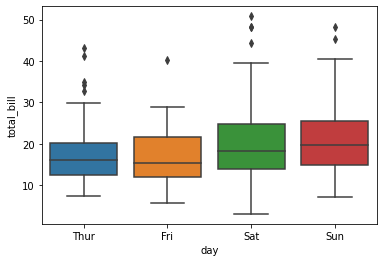

In [56]:
sns.boxplot(y=df.total_bill, x=df.day)

day
Thur    AxesSubplot(0.125,0.125;0.775x0.755)
Fri     AxesSubplot(0.125,0.125;0.775x0.755)
Sat     AxesSubplot(0.125,0.125;0.775x0.755)
Sun     AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_bill, dtype: object

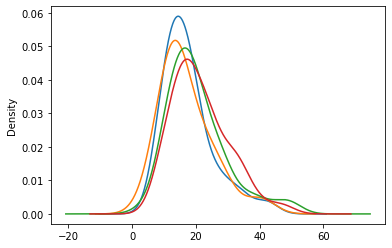

In [57]:
df.groupby('day')['total_bill'].plot(kind='kde')

In [58]:
# Verify the average dia of bearing is same across all the machines A,B and C @8% level of significance
A = np.array([24,26,30])
B = np.array([22,20,24])
C = np.array([20,24,26])

In [59]:
st.f_oneway(A,B,C) # F-ratio cannot be negative

F_onewayResult(statistic=2.2941176470588234, pvalue=0.18196296296296294)

In [60]:
# p-value
st.f.sf(2.2941176470588234,2,6)

0.18196296296296294

In [61]:
# F-critical
st.f.isf(0.08,2,6)

3.9623832504191694

In [62]:
Ft = df[df.day=='Fri']['total_bill']

In [63]:
Ft

90     28.97
91     22.49
92      5.75
93     16.32
94     22.75
95     40.17
96     27.28
97     12.03
98     21.01
99     12.46
100    11.35
101    15.38
220    12.16
221    13.42
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: total_bill, dtype: float64

In [64]:
#Tt
#Satt
#Sunt


In [65]:
# Two way ANOVA test
# Verift that the average total bill is same across all the days @ 5% level of significance
# H0: mu_total bill is same for all the days
# H1: mu_total bill is different for any two days

In [66]:
alpha = 0.05

In [67]:
df.groupby('day')['total_bill'].describe()

count       mean       std   min      25%    50%      75%    max
day                                                                   
Thur   62.0  17.682742  7.886170  7.51  12.4425  16.20  20.1550  43.11
Fri    19.0  17.151579  8.302660  5.75  12.0950  15.38  21.7500  40.17
Sat    87.0  20.441379  9.480419  3.07  13.9050  18.24  24.7400  50.81
Sun    76.0  21.410000  8.832122  7.25  14.9875  19.63  25.5975  48.17

In [68]:
Tt = df[df.day=='Thurs']['total_bill']
Ft = df[df.day=='Fri']['total_bill']
Satt = df[df.day=='Sat']['total_bill']
Sunt = df[df.day=='Sun']['total_bill']

In [69]:
# test of Normality for 'Friday total bill' - Shapiro test: H0 pop data = Normal, H1 pop data!= Normal
st.shapiro(Ft)

ShapiroResult(statistic=0.8957934975624084, pvalue=0.04085645452141762)

In [70]:
sample = np.array(df.total_bill[15:35])

In [71]:
sample

array([21.58, 10.33, 16.29, 16.97, 20.65, 17.92, 20.29, 15.77, 39.42,
       19.82, 17.81, 13.37, 12.69, 21.7 , 19.65,  9.55, 18.35, 15.06,
       20.69, 17.78])

In [72]:
# checking the normality-
st.shapiro(sample)
## since it is not following so we can't go for parametric test,we go for the non-paramteric test

ShapiroResult(statistic=0.7956845760345459, pvalue=0.0007455013110302389)

In [73]:
median = np.median(sample)
median

17.865000000000002

In [74]:
popu_median = 20

In [75]:
sample_diff = sample - median
sample_diff

array([ 3.715, -7.535, -1.575, -0.895,  2.785,  0.055,  2.425, -2.095,
       21.555,  1.955, -0.055, -4.495, -5.175,  3.835,  1.785, -8.315,
        0.485, -2.805,  2.825, -0.085])

In [76]:
st.wilcoxon(sample_diff)

WilcoxonResult(statistic=103.0, pvalue=0.956329345703125)

In [77]:
df1 = df[15:35]

In [78]:
df1

total_bill   tip     sex smoker  day    time  size
15       21.58  3.92    Male     No  Sun  Dinner     2
16       10.33  1.67  Female     No  Sun  Dinner     3
17       16.29  3.71    Male     No  Sun  Dinner     3
18       16.97  3.50  Female     No  Sun  Dinner     3
19       20.65  3.35    Male     No  Sat  Dinner     3
20       17.92  4.08    Male     No  Sat  Dinner     2
21       20.29  2.75  Female     No  Sat  Dinner     2
22       15.77  2.23  Female     No  Sat  Dinner     2
23       39.42  7.58    Male     No  Sat  Dinner     4
24       19.82  3.18    Male     No  Sat  Dinner     2
25       17.81  2.34    Male     No  Sat  Dinner     4
26       13.37  2.00    Male     No  Sat  Dinner     2
27       12.69  2.00    Male     No  Sat  Dinner     2
28       21.70  4.30    Male     No  Sat  Dinner     2
29       19.65  3.00  Female     No  Sat  Dinner     2
30        9.55  1.45    Male     No  Sat  Dinner     2
31       18.35  2.50    Male     No  Sat  Dinner     4
32       15.06  3.00  Female     No  Sat  Dinner     2
33       20.69  2.45  Female     No  Sat  Dinner     4
34       17.78  3.27    Male     No  Sat  Dinner     2

In [79]:
tt_m = df[df.sex=='Male']['total_bill']

In [83]:
tt_f = df[df.sex=='Female']['total_bill']

In [84]:
st.shapiro(tt_m)

ShapiroResult(statistic=0.9187343120574951, pvalue=1.0275331163711598e-07)

In [85]:
st.mannwhitneyu(tt_m,tt_f)

MannwhitneyuResult(statistic=8045.5, pvalue=0.021350332087987117)

In [92]:
# verify the population average is $20 for a given sample @5% level of significance

Tt = df[df.day=='Thurs']['total_bill']
Ft = df[df.day=='Fri']['total_bill']
Satt = df[df.day=='Sat']['total_bill']
Sunt = df[df.day=='Sun']['total_bill']

In [93]:
# test of Normality for 'Friday total bill' - Shapiro test: H0 pop data = Normal, H1 pop data!= Normal
st.shapiro(Ft)

ShapiroResult(statistic=0.8957934975624084, pvalue=0.04085645452141762)

In [109]:
st.kruskal(Tt,Ft,Satt,Sunt)

KruskalResult(statistic=nan, pvalue=nan)

In [96]:
# is total bill impacted by day or time or both at 5% level of significance?

In [103]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [108]:
model1 = ols('total_bill~day+time', data=df).fit()
anova_table = anova_lm(model1)
anova_table

df        sum_sq     mean_sq        F    PR(>F)
day         3.0    643.941362  214.647121  2.78294  0.041613
time        1.0    180.545023  180.545023  2.34080  0.127347
Residual  239.0  18433.977698   77.129614      NaN       NaN

In [105]:
model2 = ols('total_bill~day', data=df).fit()
anova_table = anova_lm(model2)
anova_table

df        sum_sq     mean_sq         F    PR(>F)
day         3.0    643.941362  214.647121  2.767479  0.042454
Residual  240.0  18614.522721   77.560511       NaN       NaN

In [106]:
244-4

240

In [107]:
# p-value
st.f.sf(2.76479,3,240)

0.04260341489932696

In [111]:
!pip install pydataset

  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=fe4fd8e78f5c045993eeaced1b6c69a6a6b0f4a14d2bcb75486a06970ad26009
  Stored in directory: c:\users\shivantripathi\appdata\local\pip\cache\wheels\6b\86\a7\f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset


In [112]:
from pydataset import data

initiated datasets repo at: C:\Users\shivantripathi\.pydataset/


In [114]:
cw1 = data('Chickwts')

Did you mean:
chickwts, Chirot, cities, cubits, HorseKicks, heights, Hitters, bioChemists


In [115]:
cw = data('chickwts')

In [116]:
cw.head()

weight       feed
1     179  horsebean
2     160  horsebean
3     136  horsebean
4     227  horsebean
5     217  horsebean

In [117]:
cw.shape

(71, 2)

In [118]:
cw.feed.value_counts

<bound method IndexOpsMixin.value_counts of 1     horsebean
2     horsebean
3     horsebean
4     horsebean
5     horsebean
6     horsebean
7     horsebean
8     horsebean
9     horsebean
10    horsebean
11      linseed
12      linseed
13      linseed
14      linseed
15      linseed
16      linseed
17      linseed
18      linseed
19      linseed
20      linseed
21      linseed
22      linseed
23      soybean
24      soybean
25      soybean
26      soybean
27      soybean
28      soybean
29      soybean
30      soybean
31      soybean
32      soybean
33      soybean
34      soybean
35      soybean
36      soybean
37    sunflower
38    sunflower
39    sunflower
40    sunflower
41    sunflower
42    sunflower
43    sunflower
44    sunflower
45    sunflower
46    sunflower
47    sunflower
48    sunflower
49     meatmeal
50     meatmeal
51     meatmeal
52     meatmeal
53     meatmeal
54     meatmeal
55     meatmeal
56     meatmeal
57     meatmeal
58     meatmeal
59     meatmeal
60       cas

In [119]:
cw.feed.value_counts()

soybean      14
linseed      12
sunflower    12
casein       12
meatmeal     11
horsebean    10
Name: feed, dtype: int64

In [123]:
cw.feed.describe()

count          71
unique          6
top       soybean
freq           14
Name: feed, dtype: object

In [128]:
cw.describe()

weight
count   71.000000
mean   261.309859
std     78.073700
min    108.000000
25%    204.500000
50%    258.000000
75%    323.500000
max    423.000000

In [130]:
cw.groupby('feed')['weight'].describe()

count        mean        std    min     25%    50%     75%    max
feed                                                                        
casein      12.0  323.583333  64.433840  216.0  277.25  342.0  370.75  404.0
horsebean   10.0  160.200000  38.625841  108.0  137.00  151.5  176.25  227.0
linseed     12.0  218.750000  52.235698  141.0  178.00  221.0  257.75  309.0
meatmeal    11.0  276.909091  64.900623  153.0  249.50  263.0  320.00  380.0
soybean     14.0  246.428571  54.129068  158.0  206.75  248.0  270.00  329.0
sunflower   12.0  328.916667  48.836384  226.0  312.75  328.0  340.25  423.0

In [143]:
casein = cw[cw.feed=='casein']['weight']
horsebean = cw[cw.feed=='horsebean']['weight']
linseed = cw[cw.feed=='linseed']['weight']
meatmeal = cw[cw.feed=='meatmeal']['weight']
soybean = cw[cw.feed=='soybean']['weight']
sunflower= cw[cw.feed=='sunflower']['weight']

In [147]:
st.shapiro(casein)

ShapiroResult(statistic=0.9166256785392761, pvalue=0.2591840326786041)

In [148]:
st.shapiro(horsebean)

ShapiroResult(statistic=0.9375833868980408, pvalue=0.5264502763748169)

In [145]:
st.shapiro(soybean)

ShapiroResult(statistic=0.946402907371521, pvalue=0.5063774585723877)

In [146]:
st.kruskal(casein,horsebean,linseed,meatmeal,soybean,sunflower)

KruskalResult(statistic=37.34271769425624, pvalue=5.112829511937094e-07)

In [149]:
st.shapiro(linseed)

ShapiroResult(statistic=0.9693127870559692, pvalue=0.903472900390625)

In [150]:
st.shapiro(sunflower)

ShapiroResult(statistic=0.9280883073806763, pvalue=0.3602898418903351)

In [151]:
st.shapiro(meatmeal)

ShapiroResult(statistic=0.979138195514679, pvalue=0.9611803889274597)

In [152]:
# checking whether all the population are having the same variance- 
# Levene test-

st.levene(casein,horsebean,linseed,meatmeal,soybean,sunflower)

LeveneResult(statistic=0.7492638944937443, pvalue=0.58960950480091)

In [155]:
st.f_oneway(casein,horsebean,linseed,meatmeal,soybean,sunflower)

F_onewayResult(statistic=15.364799774712534, pvalue=5.936419853471331e-10)

In [157]:
st.f.sf(15.364799774712534,5,65)

5.936419853471331e-10

In [159]:
model_cw = ols('weight~feed', data=cw).fit()
anova_table_cw = anova_lm (model_cw)
anova_table_cw

df         sum_sq       mean_sq        F        PR(>F)
feed       5.0  231129.162103  46225.832421  15.3648  5.936420e-10
Residual  65.0  195556.020996   3008.554169      NaN           NaN

feed
casein       AxesSubplot(0.125,0.125;0.775x0.755)
horsebean    AxesSubplot(0.125,0.125;0.775x0.755)
linseed      AxesSubplot(0.125,0.125;0.775x0.755)
meatmeal     AxesSubplot(0.125,0.125;0.775x0.755)
soybean      AxesSubplot(0.125,0.125;0.775x0.755)
sunflower    AxesSubplot(0.125,0.125;0.775x0.755)
Name: weight, dtype: object

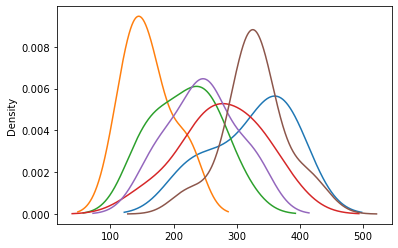

In [160]:
cw.groupby('feed')['weight'].plot(kind='kde')

<AxesSubplot:xlabel='feed', ylabel='weight'>

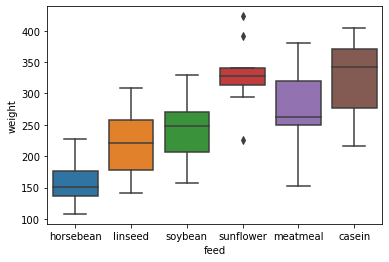

In [161]:
sns.boxplot(y=cw.weight, x = cw.feed)

In [162]:
cw.groupby('feed')['weight'].describe()

count        mean        std    min     25%    50%     75%    max
feed                                                                        
casein      12.0  323.583333  64.433840  216.0  277.25  342.0  370.75  404.0
horsebean   10.0  160.200000  38.625841  108.0  137.00  151.5  176.25  227.0
linseed     12.0  218.750000  52.235698  141.0  178.00  221.0  257.75  309.0
meatmeal    11.0  276.909091  64.900623  153.0  249.50  263.0  320.00  380.0
soybean     14.0  246.428571  54.129068  158.0  206.75  248.0  270.00  329.0
sunflower   12.0  328.916667  48.836384  226.0  312.75  328.0  340.25  423.0

In [167]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [168]:
pairwise_tukeyhsd(cw.weight, cw.feed)

In [170]:
pairwise_tukeyhsd(cw.weight, cw.feed).summary()

<class 'statsmodels.iolib.table.SimpleTable'>